In [ ]:
!pip install transformers
!pip install torch
!pip install osmnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 105.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 56.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
import pandas as pd
import numpy as np
import osmnx as ox
import matplotlib.pyplot as plt
import math
from pathlib import Path


In [ ]:
eved_folder = "./eVED"

def load_csv_files(folder_path, chunk_size=100000):
    folder_path = Path(folder_path)
    csv_files = list(folder_path.glob('*.csv'))
    print(f"Found {len(csv_files)} CSV files")

    for file in csv_files:
        print(f"  - {file.name} ({file.stat().st_size / (1024*1024):.2f} MB)")

    dataframes = []
    for file in csv_files:
        try:
            file_size_mb = file.stat().st_size / (1024*1024)

            if file_size_mb > 500:
                print(f"Loading {file.name} in chunks...")

                chunks = pd.read_csv(file, chunksize=chunk_size, low_memory=False)
                df_chunks = []
                for chunk in chunks:

                    df_chunks.append(chunk)
                df = pd.concat(df_chunks, ignore_index=True)
            else:
                df = pd.read_csv(file, low_memory=False)

            df['source_file'] = file.name
            dataframes.append(df)
            print(f"Successfully loaded {file.name}")

        except Exception as e:
            print(f"Error loading {file}: {e}")

    if not dataframes:
        print("No files were successfully loaded")
        return pd.DataFrame()

    return pd.concat(dataframes, ignore_index=True)

ev_df = load_csv_files(eved_folder)
print(f"Total rows in combined dataset: {len(ev_df)}")
print(f"Columns: {ev_df.columns.tolist()}")
ev_df.head()

Found 5 CSV files
  - eVED_181010_week.csv (10.00 MB)
  - eVED_180926_week.csv (11.00 MB)
  - eVED_180919_week.csv (9.00 MB)
  - eVED_180829_week.csv (12.00 MB)
  - eVED_181017_week.csv (8.00 MB)
Successfully loaded eVED_181010_week.csv
Successfully loaded eVED_180926_week.csv
Successfully loaded eVED_180919_week.csv
Successfully loaded eVED_180829_week.csv
Successfully loaded eVED_181017_week.csv
Total rows in combined dataset: 207566
Columns: ['DayNum', 'VehId', 'Trip', 'Timestamp(ms)', 'Latitude[deg]', 'Longitude[deg]', 'Vehicle Speed[km/h]', 'MAF[g/sec]', 'Engine RPM[RPM]', 'Absolute Load[%]', 'OAT[DegC]', 'Fuel Rate[L/hr]', 'Air Conditioning Power[kW]', 'Air Conditioning Power[Watts]', 'Heater Power[Watts]', 'HV Battery Current[A]', 'HV Battery SOC[%]', 'HV Battery Voltage[V]', 'Short Term Fuel Trim Bank 1[%]', 'Short Term Fuel Trim Bank 2[%]', 'Long Term Fuel Trim Bank 1[%]', 'Long Term Fuel Trim Bank 2[%]', 'Elevation Raw[m]', 'Elevation Smoothed[m]', 'Gradient', 'Energy_Consump

,DayNum,VehId,Trip,Timestamp(ms),Latitude[deg],Longitude[deg],Vehicle Speed[km/h],MAF[g/sec],Engine RPM[RPM],Absolute Load[%],...,Matchted Latitude[deg],Matched Longitude[deg],Match Type,Class of Speed Limit,Speed Limit[km/h],Speed Limit with Direction[km/h],Intersection,Bus Stops,Focus Points,source_file
0,344.061627,10.0,3145.0,0.0,42.281402,-83.743872,36.200001,NaN,NaN,NaN,...,42.281280,-83.743879,0.0,0.0,48,48.0,NaN,NaN,NaN,eVED_181010_week.csv
1,344.061627,10.0,3145.0,300.0,42.281402,-83.743872,35.750000,NaN,NaN,NaN,...,42.281280,-83.743879,1.0,0.0,48,48.0,NaN,NaN,NaN,eVED_181010_week.csv
2,344.061627,10.0,3145.0,1300.0,42.281402,-83.743872,35.450001,NaN,NaN,NaN,...,42.281280,-83.743879,1.0,0.0,48,48.0,NaN,NaN,NaN,eVED_181010_week.csv
3,344.061627,10.0,3145.0,2400.0,42.281306,-83.743565,34.989998,NaN,NaN,NaN,...,42.281271,-83.743567,0.0,0.0,48,48.0,NaN,NaN,NaN,eVED_181010_week.csv
4,344.061627,10.0,3145.0,2600.0,42.281306,-83.743565,34.989998,NaN,NaN,NaN,...,42.281271,-83.743567,1.0,0.0,48,48.0,NaN,NaN,NaN,eVED_181010_week.csv


In [4]:
def lat_to_token(lat):
    return f"LAT_{int(round(lat * 10000))}"

def lng_to_token(lng):
    return f"LNG_{int(round(abs(lng) * 10000))}"

def coords_to_tokens(source, dest):
    src_lat_tok = lat_to_token(source[0])
    src_lng_tok = lng_to_token(source[1])
    dst_lat_tok = lat_to_token(dest[0])
    dst_lng_tok = lng_to_token(dest[1])

    return f"[SRC] {src_lat_tok} {src_lng_tok} [DST] {dst_lat_tok} {dst_lng_tok}"

In [5]:
grouped = ev_df.groupby(['VehId', 'Trip'])

# Extract complete routes as sequences
route_sequences = []
routes_total = 0;

for (vehid, trip), group in grouped:
    # Sort by timestamp to ensure correct sequence
    group = group.sort_values('Timestamp(ms)')

    # Extract coordinates as sequence
    route = list(zip(group['Latitude[deg]'], group['Longitude[deg]']))

    # Store as (source, destination, full_route)
    source = route[0]
    destination = route[-1]
    route_sequences.append({
        'source': source,
        'destination': destination,
        'full_route': route,
        'vehicle': vehid,
        'trip': trip,
    })

    routes_total += 1


print(routes_total)

290


In [6]:
def create_features(route_data):
    return [coords_to_tokens(d['source'], d['destination']) for d in route_data]


In [7]:
LAT_MIN, LAT_MAX = 33.0, 38.0
LNG_MIN, LNG_MAX = -123.0, -117.0

def normalize(lat, lng):
    norm_lat = (lat - LAT_MIN) / (LAT_MAX - LAT_MIN)
    norm_lng = (lng - LNG_MIN) / (LNG_MAX - LNG_MIN)
    return norm_lat, norm_lng

In [8]:
from torch.utils.data import Dataset, DataLoader

class RouteDataset(Dataset):
  def __init__(self, route_data, tokenizer, max_points=100):
    self.route_data = route_data
    self.tokenizer = tokenizer
    self.max_points = max_points
    self.features = create_features(route_data)
    self.route_targets = self.tokenize_routes(route_data)

  def __len__(self):
    return len(self.route_data)

  def __getitem__(self, idx):
    item_ft = self.features[idx]
    item_tokenized = self.tokenizer(
        item_ft, padding="max_length", truncation=True, max_length=32,
        return_tensors="pt"
    )

    target = self.route_targets[idx]
    item = {
        'input_ids': item_tokenized['input_ids'].squeeze(),
        'attention_mask': item_tokenized['attention_mask'].squeeze(),
        'target_routes': torch.tensor(target, dtype=torch.float32)
    }

    return item

  def tokenize_routes(self, route_data):
    tokenized_routes = []
    for data in route_data:
        route = data['full_route']
        if len(route) > self.max_points:
            indices = np.linspace(0, len(route)-1, self.max_points).astype(int)
            route = [route[i] for i in indices]
        else:
            route = route + [(0, 0)] * (self.max_points - len(route))

        flat_route = []
        for lat, lng in route:
          norm_lat, norm_lng = normalize(lat, lng)
          flat_route.append(norm_lat)
          flat_route.append(norm_lng)

        tokenized_routes.append(flat_route)
    return tokenized_routes


In [9]:
def get_dataloader(route_data, tokenizer, batch_size=8, shuffle=True, max_points=100):
  dataset = RouteDataset(route_data, tokenizer, max_points=max_points)
  loader = DataLoader(
      dataset, batch_size=batch_size,
      shuffle=shuffle,
      num_workers=0,
      pin_memory=True
  )

  return loader

In [10]:
from transformers import BertModel, BertConfig, BertTokenizer, BertTokenizerFast
import torch.nn as nn
import torch

class RoutePredictor(nn.Module):
    def __init__(self):
        super(RoutePredictor, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        hidden_size = self.bert.config.hidden_size

        # Adjust the output dimension to match your target shape (100 points × 2 coordinates)
        self.route_head = nn.Sequential(
            nn.Linear(hidden_size, 512),
            nn.ReLU(),
            nn.Linear(512, 200)  # 100 points with lat/lng for each point
        )

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        cls_output = outputs.last_hidden_state[:, 0]  # Use [CLS] token representation
        route_prediction = self.route_head(cls_output)
        return route_prediction.view(route_prediction.size(0), -1, 2)  # Reshape to (batch, points, 2)


In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [12]:
from sklearn.model_selection import train_test_split

train_data, val_data = train_test_split(route_sequences, test_size=0.2, random_state=42)

def train_model(model, train_data, val_data, tokenizer, epochs=10):
    #tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    train_loader = get_dataloader(train_data, tokenizer)
    val_loader = get_dataloader(val_data, tokenizer)

    optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)
    loss_fn = nn.MSELoss()

    for param in model.bert.parameters():
    param.requires_grad = False

    for epoch in range(epochs):
      model.train()
      train_loss = 0

      if epoch == 5:
      for param in model.bert.parameters():
          param.requires_grad = True

      for batch in train_loader:
        optimizer.zero_grad()

        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        target_routes = batch['target_routes'].to(device)
        target_routes = target_routes.view(target_routes.size(0), 100, 2)

        outputs = model(input_ids, attention_mask)
        loss = loss_fn(outputs, target_routes)

        loss.backward()
        optimizer.step()

        train_loss += loss.item()

      model.eval()
      val_loss = 0

      with torch.no_grad():
          for batch in val_loader:
              input_ids = batch['input_ids'].to(device)
              attention_mask = batch['attention_mask'].to(device)
              target_routes = batch['target_routes'].to(device)
              target_routes = target_routes.view(target_routes.size(0), 100, 2)

              outputs = model(input_ids, attention_mask)
              loss = loss_fn(outputs, target_routes)
              val_loss += loss.item()

      print(f"Epoch {epoch+1}/{epochs}")
      print(f"Train Loss: {train_loss/len(train_loader):.4f}")
      print(f"Val Loss: {val_loss/len(val_loader):.4f}")

In [14]:

model = RoutePredictor()
model.to(device)

lat_tokens = [f"LAT_{i}" for i in range(int(LAT_MIN * 10000), int(LAT_MAX * 10000))]
lng_tokens = [f"LNG_{i}" for i in range(int(abs(LNG_MIN) * 10000), int(abs(LNG_MAX) * 10000))]

special_tokens = ["[SRC]", "[DST]"]
custom_vocab = lat_tokens + lng_tokens + special_tokens

tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")
tokenizer.add_tokens(custom_vocab)
model.bert.resize_token_embeddings(len(tokenizer))

train_model(model, train_data, val_data, tokenizer, epochs=20)

Epoch 1/20
Train Loss: 21.4495
Val Loss: 19.9332
Epoch 2/20
Train Loss: 19.0162
Val Loss: 17.5390
Epoch 3/20
Train Loss: 16.3371
Val Loss: 14.4728
Epoch 4/20
Train Loss: 12.9929
Val Loss: 10.8989
Epoch 5/20
Train Loss: 9.3913
Val Loss: 7.3879
Epoch 6/20
Train Loss: 6.0968
Val Loss: 4.4389
Epoch 7/20
Train Loss: 3.5156
Val Loss: 2.3400
Epoch 8/20
Train Loss: 1.7961
Val Loss: 1.0886
Epoch 9/20
Train Loss: 0.8355
Val Loss: 0.4739
Epoch 10/20
Train Loss: 0.3785
Val Loss: 0.2042
Epoch 11/20
Train Loss: 0.1752
Val Loss: 0.0866
Epoch 12/20
Train Loss: 0.0839
Val Loss: 0.0352
Epoch 13/20
Train Loss: 0.0440
Val Loss: 0.0142
Epoch 14/20
Train Loss: 0.0276
Val Loss: 0.0063
Epoch 15/20
Train Loss: 0.0214
Val Loss: 0.0042
Epoch 16/20
Train Loss: 0.0192
Val Loss: 0.0034
Epoch 17/20
Train Loss: 0.0184
Val Loss: 0.0035
Epoch 18/20
Train Loss: 0.0181
Val Loss: 0.0035
Epoch 19/20
Train Loss: 0.0179
Val Loss: 0.0036
Epoch 20/20
Train Loss: 0.0180
Val Loss: 0.0033


In [15]:
def predict_route(model, tokenizer, source, destination):
    model.eval()

    feature = f"[SRC] {source[0]:.6f} {source[1]:.6f} [DST] {destination[0]:.6f} {destination[1]:.6f}"
    inputs = tokenizer(feature, return_tensors="pt", padding="max_length", truncation=True, max_length=128)

    input_ids = inputs["input_ids"].to(device)
    attention_mask = inputs["attention_mask"].to(device)

    with torch.no_grad():
        predicted_coords = model(input_ids=input_ids, attention_mask=attention_mask)

    predicted_route = [(coord[0].item(), coord[1].item()) for coord in predicted_coords[0]]
    return predicted_route


In [16]:
def visualize_control_and_predicted_route(df, veh_id, trip_id, model, tokenizer):
    route_df = df[(df['VehId'] == veh_id) & (df['Trip'] == trip_id)]
    route_df = route_df.sort_values('Timestamp(ms)')

    lats = route_df['Latitude[deg]'].tolist()
    lngs = route_df['Longitude[deg]'].tolist()

    if len(lats) == 0:
        print(f"No data found for Vehicle {veh_id}, Trip {trip_id}")
        return

    source = (lats[0], lngs[0])
    destination = (lats[-1], lngs[-1])

    predicted_route = predict_route(model, tokenizer, source, destination)
    pred_lats = [coord[0] for coord in predicted_route]
    pred_lngs = [coord[1] for coord in predicted_route]

    all_lats = lats + pred_lats
    all_lngs = lngs + pred_lngs
    north, south = max(all_lats) + 0.01, min(all_lats) - 0.01
    east, west = max(all_lngs) + 0.01, min(all_lngs) - 0.01
    bbox = (west, south, east, north)

    G = ox.graph.graph_from_bbox(
        bbox=bbox,
        network_type='drive_service',
        simplify=True
    )

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

    ox.plot_graph(G, ax=ax1, show=False, close=False, node_size=0, edge_linewidth=0.5)
    ax1.plot(lngs, lats, 'r-', linewidth=2, label='Actual Route')
    ax1.plot(lngs[0], lats[0], 'go', markersize=10, label='Start')
    ax1.plot(lngs[-1], lats[-1], 'bo', markersize=10, label='End')
    ax1.set_title(f'Actual Route for Vehicle {veh_id}, Trip {trip_id}')
    ax1.legend()

    ox.plot_graph(G, ax=ax2, show=False, close=False, node_size=0, edge_linewidth=0.5)
    ax2.plot(pred_lngs, pred_lats, 'r-', linewidth=2, label='Predicted Route')
    ax2.plot(lngs[0], lats[0], 'go', markersize=10, label='Start')
    ax2.plot(lngs[-1], lats[-1], 'bo', markersize=10, label='End')
    ax2.set_title(f'Model Prediction for Vehicle {veh_id}, Trip {trip_id}')
    ax2.legend()

    plt.tight_layout()
    plt.show()


In [18]:
visualize_control_and_predicted_route(ev_df, veh_id=10, trip_id=3145, model=model, tokenizer=tokenizer)

/usr/local/lib/python3.11/dist-packages/osmnx/_overpass.py:267: UserWarning: This area is 20,651 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


KeyboardInterrupt: 

In [19]:
import numpy as np
from math import radians, cos, sin, sqrt, atan2

def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371000  # meters
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)

    a = sin(dlat/2)**2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

def evaluate_route_prediction(df, veh_id, trip_id, model, tokenizer, max_points=100):
    route_df = df[(df['VehId'] == veh_id) & (df['Trip'] == trip_id)]
    route_df = route_df.sort_values('Timestamp(ms)')

    lats = route_df['Latitude[deg]'].tolist()
    lngs = route_df['Longitude[deg]'].tolist()

    if len(lats) < 2:
        print("Not enough points for evaluation.")
        return

    source = (lats[0], lngs[0])
    destination = (lats[-1], lngs[-1])

    predicted = predict_route(model, tokenizer, source, destination)

    true_route = list(zip(lats, lngs))
    if len(true_route) > max_points:
        indices = np.linspace(0, len(true_route) - 1, max_points).astype(int)
        true_route = [true_route[i] for i in indices]
    else:
        true_route += [(true_route[-1])] * (max_points - len(true_route))

    distances = [
        haversine_distance(t[0], t[1], p[0], p[1])
        for t, p in zip(true_route, predicted)
    ]

    avg_error = np.mean(distances)
    max_error = np.max(distances)

    print(f"Route Evaluation for Vehicle {veh_id}, Trip {trip_id}:")
    print(f"  ➤ Average Error: {avg_error:.2f} meters")
    print(f"  ➤ Maximum Error: {max_error:.2f} meters")

    return {
        "avg_error_m": avg_error,
        "max_error_m": max_error,
        "pointwise_errors": distances,
        "true_route": true_route,
        "predicted_route": predicted
    }


In [22]:
results = evaluate_route_prediction(ev_df, veh_id=10, trip_id=3145, model=model, tokenizer=tokenizer)

Route Evaluation for Vehicle 10, Trip 3145:
  ➤ Average Error: 9895664.74 meters
  ➤ Maximum Error: 9900164.86 meters


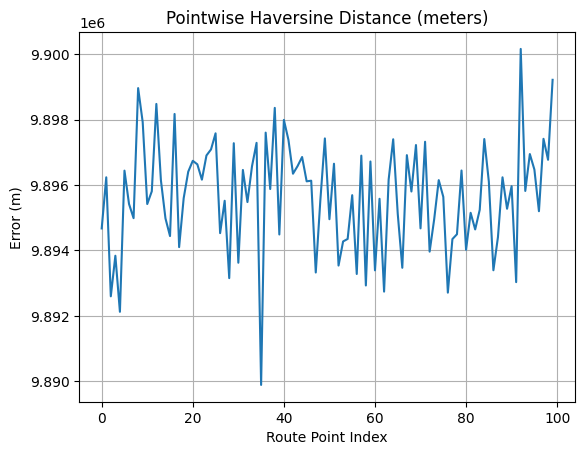

In [23]:
plt.plot(results["pointwise_errors"])
plt.title("Pointwise Haversine Distance (meters)")
plt.xlabel("Route Point Index")
plt.ylabel("Error (m)")
plt.grid(True)
plt.show()